## Data/Theory compasion for NR of supported lipid membrane

Let's consider a single contrast dataset (D$_{2}$O) of a supported bilayer at the Si / water interface acquired at the MARIA neutron reflectometer (MLZ). We will build a model for the membrane and check the effect of the membrane thickness on the agreement with the experimental data.

First let's import _anaklasis.ref_

In [1]:
from anaklasis import ref

We name the project as 'membrane_ref_data_comparison'. All results will be exported in a folder with this name. Then we import the experimental curve and we set input units to Angstrom.

In [2]:
project='membrane_ref_data_comparison'
input_file = 'membrane.dat' # input curve
units = ['A'] # Q units in Angstrom

We model the interface as Si/ SiO$_{2}$ / thin water layer / lipid heads / lipid tails / lipid heads / water (solvent), where solvent may partially penetrate in each lipid layer. We also set the membrane roughness as a global parameter.

In [3]:
model = [
	# Re_sld  Im_sld thk  rough  solv  description 
	[  2.07e-6, 0.0, 0,    0.89, 0.0,  'Si'],
	[  3.5e-6,  0.0, 12.6, 3.82, 0.0,  'SiO2'],
	[  6.15e-6, 0.0, 4.4,  'p0', 1.0,  'D2O'],
	[  1.7e-6,  0.0, 10.6, 'p0', 0.24, 'heads'],
	[ -0.4e-6,  0.0, 25.0, 'p0', 0.03, 'tails'],
	[  1.7e-6,  0.0, 9.0,  'p0', 0.47, 'heads'],
	[  6.15e-6, 0.0,  0,   0.0,  1.0,  'D2O'],
	]

patches=[1.0] # single patch 100% coverage
system=[model] # single model(patch) system

global_param = [
	['p0', 2.67, 'roughness'],
	]

we also define the instrumental parameters.

In [4]:
resolution=[0.1] # dQ/Q=10%
background = [1.9e-7] # instrumental background
scale = [0.978] # small scale correction
qmax = [0.25] 

we finally call the fit.compare_ function

--------------------------------------------------------------------
Program ANAKLASIS - Comparison Module for X-ray/Neutron reflection 
version 1.5.0, August 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.1
--------------------------------------------------------------------
Si real sld (10^-6 A^-2)      = 2.07 
Si imaginary sld (10^-6 A^-2) = 0.00 
Si thickness (A)              = 0.00 
Si/SiO2 roughness (A) = 0.89 
Si solvent volume fraction    = 0.00 
--------------------------------------------------------------------
SiO2 real sld (10^-6 A^-2)      = 3.50 
SiO2 imaginary sld (10^-6 A^-2) = 0.00 
SiO2 thickness (A)              = 12.60 
SiO2/D2O roughness (A) = 3.82 
SiO2 solvent volume fraction    = 0.00 
--------------------------------------------------------------------
D2O real sld (10^-6 A^-2)      = 

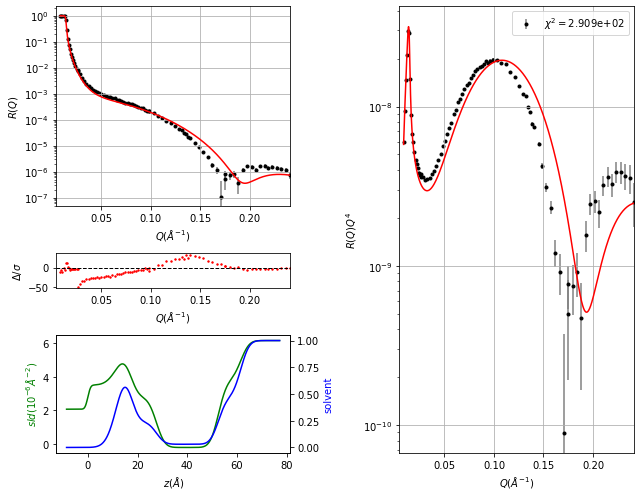

Library versions used for the calculations:
numpy: 1.20.1
scipy: 1.6.0
numdifftools: 0.9.39
sympy: 1.7.1


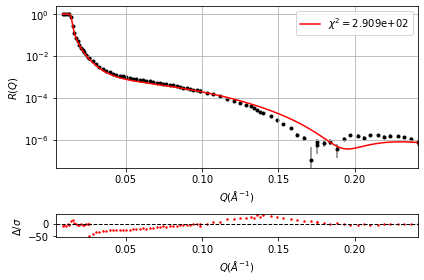

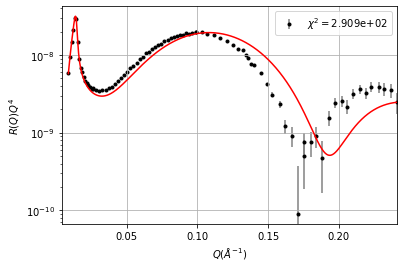

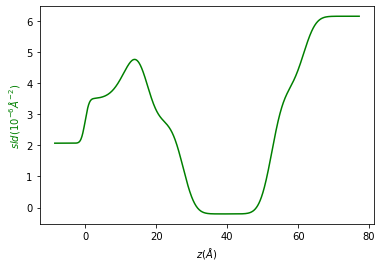

In [5]:
res = ref.compare(project, input_file, units, resolution, 
	patches, system, global_param,background, scale, qmax, 
	experror=True, plot=True)

We observe that the membrane thickness in the model is a bit low. The characteristic fringe of the theoretical curve is at higher $Q$ than the one in the experimental curve.. Let's redefine the model with a thicker lipid tail layer.

In [6]:
model = [
	# Re_sld  Im_sld thk  rough  solv  description 
	[  2.07e-6, 0.0, 0,    0.89, 0.0,  'Si'],
	[  3.5e-6,  0.0, 12.6, 3.82, 0.0,  'SiO2'],
	[  6.15e-6, 0.0, 4.4,  'p0', 1.0,  'D2O'],
	[  1.7e-6,  0.0, 10.6, 'p0', 0.24, 'heads'],
	[ -0.4e-6,  0.0, 29.2, 'p0', 0.03, 'tails'],
	[  1.7e-6,  0.0, 9.0,  'p0', 0.47, 'heads'],
	[  6.15e-6, 0.0,  0,   0.0,  1.0,  'D2O'],
	]

system=[model]

and we call again the _fit.compare_ function

--------------------------------------------------------------------
Program ANAKLASIS - Comparison Module for X-ray/Neutron reflection 
version 1.5.0, August 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------
Directory already exists.. overwriting data..


Instrumental Resolution, dQ/Q: 0.1
--------------------------------------------------------------------
Si real sld (10^-6 A^-2)      = 2.07 
Si imaginary sld (10^-6 A^-2) = 0.00 
Si thickness (A)              = 0.00 
Si/SiO2 roughness (A) = 0.89 
Si solvent volume fraction    = 0.00 
--------------------------------------------------------------------
SiO2 real sld (10^-6 A^-2)      = 3.50 
SiO2 imaginary sld (10^-6 A^-2) = 0.00 
SiO2 thickness (A)              = 12.60 
SiO2/D2O roughness (A) = 3.82 
SiO2 solvent volume fraction    = 0.00 
--------------------------------------------------------

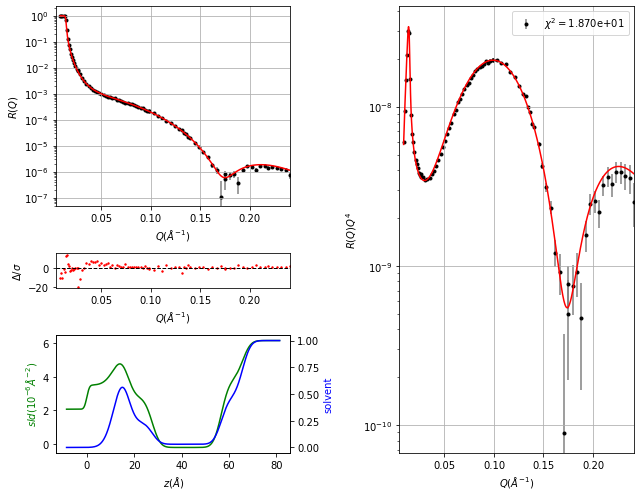

Library versions used for the calculations:
numpy: 1.20.1
scipy: 1.6.0
numdifftools: 0.9.39
sympy: 1.7.1


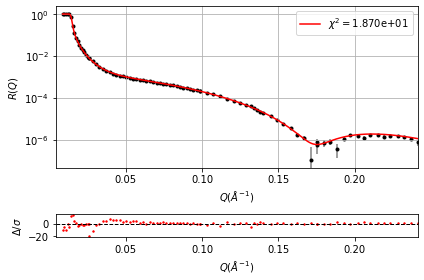

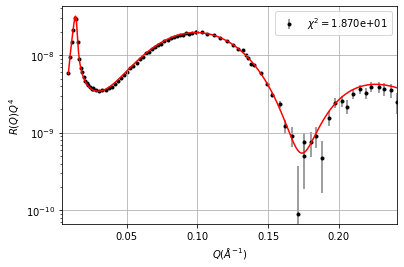

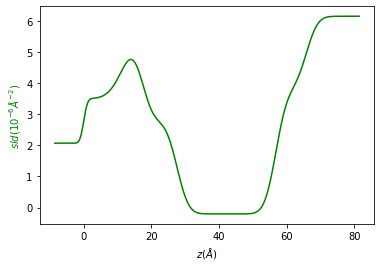

In [7]:
res = ref.compare(project, input_file, units, resolution, 
	patches, system, global_param,background, scale, qmax, 
	experror=True, plot=True)

We see that now theory and data are in much better agreement.